# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [153]:
import numpy
import pandas
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [154]:
edu_data = pandas.read_csv("../data/states_edu.csv")

edu_data.head()

edu_data.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [155]:
edu_data.rename({"GRADES_PK_G":"ENROLL_PK",
                 "GRADES_KG_G":"ENROLL_K",
                 "GRADES_4_G":"ENROLL_4",
                 "GRADES_8_G":"ENROLL_8",
                 "GRADES_12_G":"ENROLL_12",
                 "GRADES_1_8_G":"ENROLL_1-8",
                 "GRADES_9_12_G":"ENROLL_9-12",
                 "GRADES_ALL_G":"ENROLL_ALL"},
                  axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Math

How many years of data are logged in our dataset? 

In [156]:

edu_data["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [157]:
print("Michigan:")
#Average 4th grade math score for Michigan
print(edu_data.loc[edu_data["STATE"]=="MICHIGAN","AVG_MATH_4_SCORE"].mean())

print("Ohio:")
#Average 4th grade math score for Ohio
print(edu_data.loc[edu_data["STATE"]=="OHIO","AVG_MATH_4_SCORE"].mean())

Michigan:
234.36363636363637
Ohio:
239.45454545454547


Find the average for your outcome score across all states in 2019

In [158]:
edu_data.loc[edu_data["YEAR"]==2019,"AVG_MATH_4_SCORE"].mean()

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [159]:
(edu_data.groupby("STATE"))["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

In [160]:
edu_data.dropna(subset=["AVG_MATH_4_SCORE","ENROLL_ALL","TOTAL_EXPENDITURE"],inplace=True)

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [161]:



edu_data["instructional_exp_per_student"] = edu_data.INSTRUCTION_EXPENDITURE / edu_data.ENROLL_ALL
edu_data["math_score_per_total_expenditure_per_student"] = edu_data.AVG_MATH_4_SCORE / (edu_data.TOTAL_EXPENDITURE / edu_data.ENROLL_ALL)
edu_data["capital_exp_per_student"] = edu_data.CAPITAL_OUTLAY_EXPENDITURE / edu_data.ENROLL_ALL
edu_data["total_exp_per_student"] = edu_data.TOTAL_EXPENDITURE / edu_data.ENROLL_ALL




Feature engineering justification: 

Instructional expense per student will be used to compare to capital expense per student to see if one in more effective than the other. Math score per total expenditure per student represents how much a math score is expected to increase per dollar increase in per pupil expenditure.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot: title={'center': 'Average 4th Grade Math Score'}, ylabel='Frequency'>

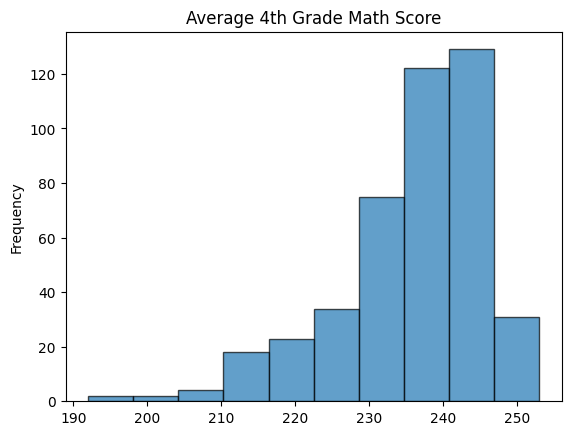

In [162]:
(edu_data.AVG_MATH_4_SCORE).plot.hist(title="Average 4th Grade Math Score", alpha=.7, edgecolor="black")

**4th grade math scores are left skewed. This means that the median is higher than the mean and that many schools perform similarly and more schools underperform than overperform their peers.**

**Visualization 2**

<AxesSubplot: xlabel='instructional_exp_per_student', ylabel='capital_exp_per_student'>

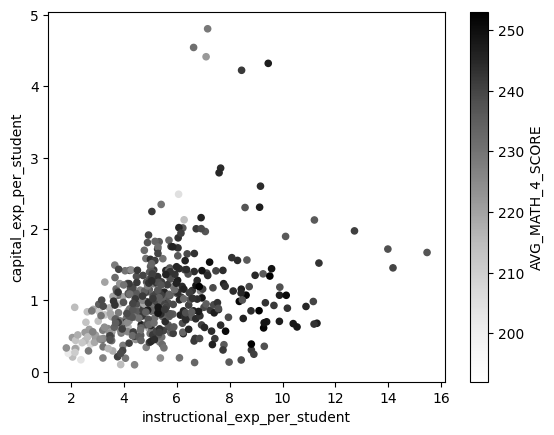

In [163]:
edu_data.plot.scatter(x="instructional_exp_per_student" , y = "capital_exp_per_student", c = "AVG_MATH_4_SCORE")

**This is a plot of instructional expense per student versus capital expense per student. The colors represent the 4th grade math score in relation to both captial expenditure and instructional expenditure. We can see that many of the states fall into a range between 2 to 12 per student in instructional expeniture and 0 to 2 in per student capital expenditure. From the color of the points, it looks like instructional expenditure is a stronger factor in determining Math scores. However it is possible that capital expenditure is not accurate as districts could have already spent money to improve their facilties so now they no longer need to spend as much**

**Vizualization 3**

<AxesSubplot: title={'center': 'Average 4th Grade Math Score'}, ylabel='Frequency'>

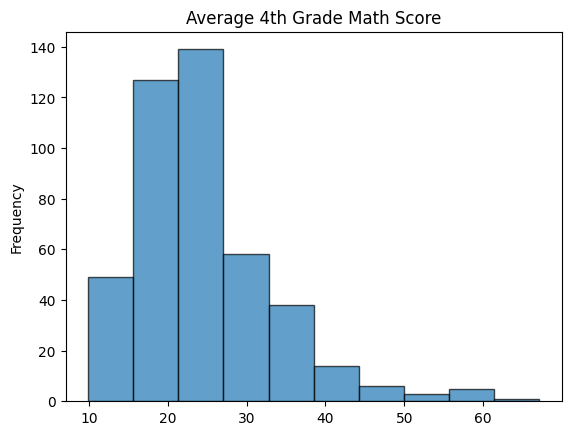

In [164]:
(edu_data.math_score_per_total_expenditure_per_student).plot.hist(title="Average 4th Grade Math Score", alpha=.7, edgecolor="black")

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [165]:
from sklearn.model_selection import train_test_split

In [166]:

X = edu_data.loc[:,["instructional_exp_per_student" , "capital_exp_per_student", "total_exp_per_student"]]
y =edu_data.loc[:, "AVG_MATH_4_SCORE"]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [168]:
# import your sklearn class here
from sklearn import linear_model


In [169]:
# create your model here
# we will use ridge linear regression as the predictors are likely to be correlated with each other
reg_cv = linear_model.RidgeCV(alphas=[.1,1,10])

In [170]:
model = reg_cv.fit(X_train, y_train)

In [171]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [172]:
print(model.intercept_)
print(model.coef_)

220.9248809956105
[ 1.24029926 -1.16456773  0.87256183]


**The intercept is around 221 meaning that this is what the math score is expected to be if the district does not spend any money on capital improvements or instruction. Interestingly the coefficent for capital expenditure is negative meaning that are model is viewing capital expenditure as decreasing the math scores.**

In [173]:
model.score(X_test, y_test)

0.33332894411378944

The model does not perform too well against the testing data. This is could signify that there are factors other than expenditure that affect 4th grade math scores.

In [174]:
numpy.mean((model.predict(X_test)-y_test)**2)**0.5

8.516473531784898

A high mean squared error means the model does not model the test data closely.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

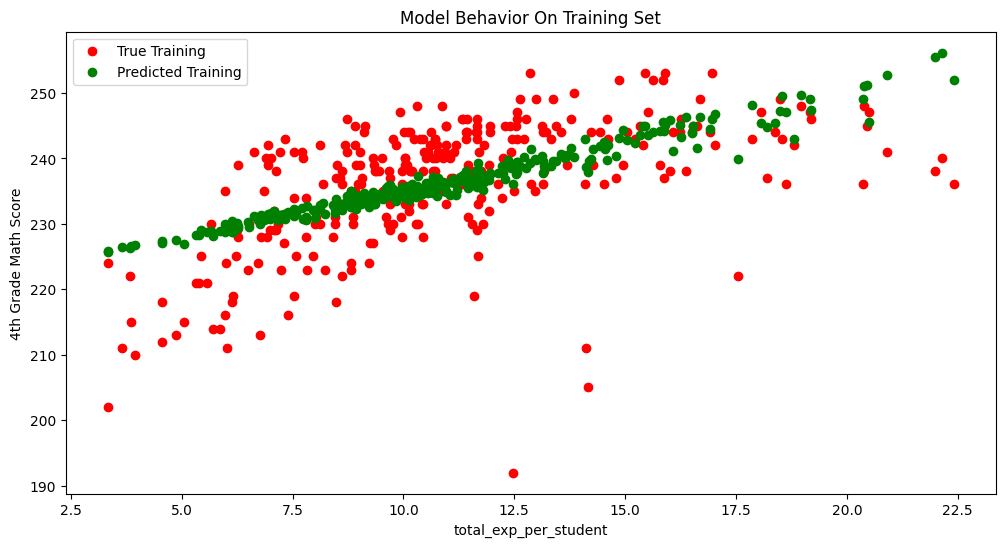

In [175]:
col_name = "total_exp_per_student"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('4th Grade Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

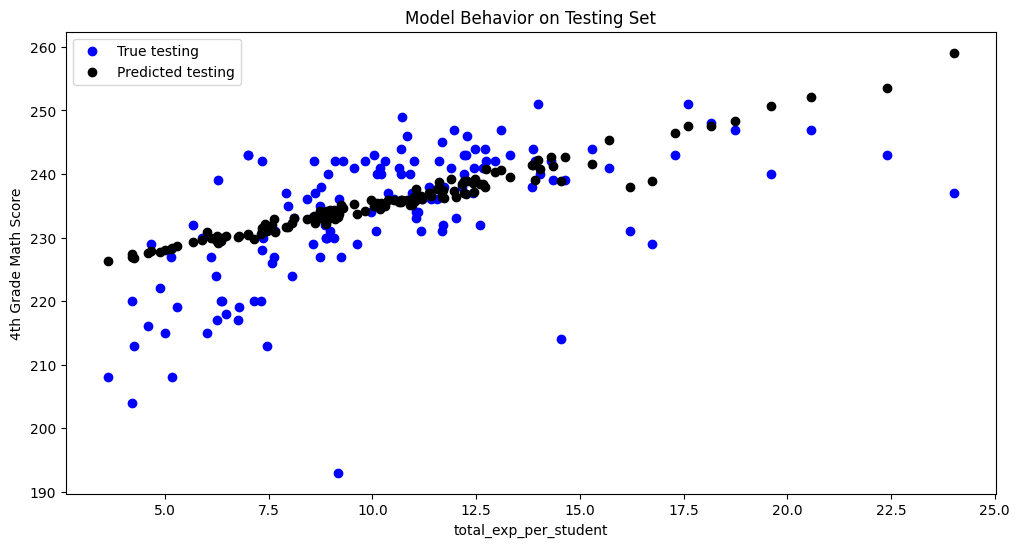

In [176]:
col_name = "total_exp_per_student"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('4th Grade Math Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**The model did not perform too well against the training data. We can see from the first graph "Model Behavior on the Training Set" that the model predicted a line for math scores in in relation to total expendiutre per student. However, the true test data is more dispersed than the predicted. A similar condition holds for the testing data. Since the linear regression model does not predict 4th grade math scores in any significant manner, it is likely that there are factors other than expenditure that affect 4th grade math scores. We can conclude that in general, more spending, especially instructional spending, leads to higher 4th grade math scores**
